# Использование готовых моделей

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Для того, чтобы получить доступ к готовым моделям, достаточно обратиться в tf.keras.applications.

In [2]:
vgg19 = tf.keras.applications.VGG19()

574710816/574710816 [==============================] - 47s 0us/step


In [3]:
# посмотрим на summary
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# но модель инициализирована случайными весами. Поэтому делать с её помощью предсказания бесполезно
# с помощью weight='imagenet' - инициализируем её параметрами, которые получились при её обучении на imagenet
# (они скачиваются из интернета)

vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [5]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2023-04-15 10:24:39--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Распознаётся github.com (github.com)… 140.82.114.3
Подключение к github.com (github.com)|140.82.114.3|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [переход]
--2023-04-15 10:24:40--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 116068 (113K) [image/jpeg]
Сохранение в: «panda.jpg»

panda.jpg           100%[===================>] 113,35K  --.-KB/s    за 0,06s   

2023-04-15 10:24:41 (1,83 MB/s) - «panda.jpg» сохранён [116068/116068]

--2023-04-15 10:24:41--  https:/

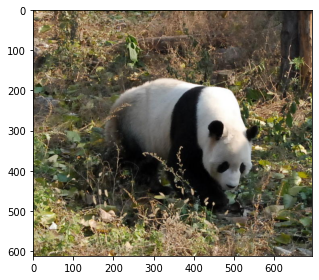

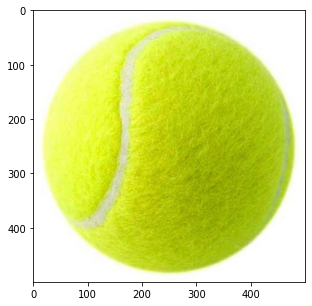

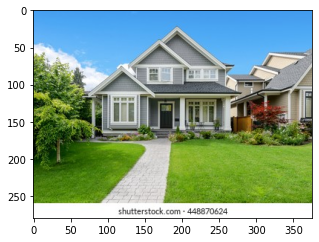

In [6]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [7]:
# попробуем применить сеть к нашему изображению
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: in user code:

    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/adwiz/miniconda3/envs/tf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vgg19" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 613, 696, 3)


In [8]:
# оказывается, модель ожидает определенный размер, учтем это
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]

prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [9]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

1/1 [==============================] - 1s 569ms/step


In [10]:
# что это
prediction

array([[1.24574684e-09, 3.30729721e-10, 3.24182281e-08, 5.64247582e-09,
        1.52658384e-08, 3.45823565e-08, 3.66371381e-07, 1.31885369e-09,
        2.10608082e-08, 6.52494059e-10, 1.46588922e-10, 1.42896162e-09,
        3.60411388e-11, 1.04988525e-08, 1.52083157e-09, 8.16266915e-11,
        1.20760684e-11, 1.53734518e-08, 4.95868484e-08, 1.25919755e-07,
        1.10416266e-10, 5.21276147e-11, 1.18818705e-10, 4.70522066e-09,
        4.95736334e-11, 1.69628808e-11, 6.26489832e-12, 1.69167024e-12,
        7.26628965e-11, 8.82414053e-09, 6.22401046e-12, 6.00246103e-11,
        9.89183215e-12, 4.44688508e-09, 1.02982699e-10, 5.39579180e-11,
        5.12364429e-10, 4.47755374e-11, 1.06405197e-11, 1.66376689e-12,
        2.38311454e-11, 1.15517546e-12, 2.61153214e-13, 3.37587727e-12,
        1.35182555e-12, 2.87073421e-10, 6.54895166e-11, 3.90624642e-12,
        9.33055078e-10, 3.82739396e-11, 4.24165668e-11, 8.06971823e-09,
        7.65115679e-11, 2.19247780e-11, 7.31840699e-11, 6.373911

In [11]:
prediction.sum(), prediction.shape # предсказали вероятности 1000 классов. как расшифровать?

(1.0000001, (1, 1000))

In [12]:
from tensorflow.keras.applications.vgg16 import decode_predictions

In [14]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

35363/35363 [==============================] - 0s 2us/step


[[('n02510455', 'giant_panda', 0.9649041),
  ('n02395406', 'hog', 0.013631356),
  ('n02134084', 'ice_bear', 0.007675187),
  ('n02120079', 'Arctic_fox', 0.007050984),
  ('n02108915', 'French_bulldog', 0.0020282795)]]

In [15]:
# для каждой сети нужен препроцессинг
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

1/1 [==============================] - 0s 11ms/step


[[('n02510455', 'giant_panda', 0.9994134),
  ('n02445715', 'skunk', 0.00030085148),
  ('n02120079', 'Arctic_fox', 0.00017698329),
  ('n02395406', 'hog', 6.985503e-05),
  ('n02114548', 'white_wolf', 8.8500665e-06)]]

In [25]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. \
          Min: {input_image.numpy().min()}")
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [26]:
# и применим на мячике
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188.           Min: -103.93900299072266
1/1 [==============================] - 0s 16ms/step


[[('n04409515', 'tennis_ball', 0.9998024),
  ('n04039381', 'racket', 0.0001239592),
  ('n03445777', 'golf_ball', 3.1679985e-05),
  ('n03134739', 'croquet_ball', 7.899238e-06),
  ('n07749582', 'lemon', 7.242902e-06)]]

А теперь попробуем другую сеть - MobileNetV2

In [27]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights='imagenet')

In [28]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# почему не правильно???

Image shape: (1, 224, 224, 3). Max: 151.06100463867188.           Min: -123.68000030517578
1/1 [==============================] - 1s 504ms/step


[[('n09229709', 'bubble', 0.05918845),
  ('n04418357', 'theater_curtain', 0.049736805),
  ('n04254680', 'soccer_ball', 0.031445242),
  ('n04442312', 'toaster', 0.02862584),
  ('n02782093', 'balloon', 0.025877042)]]

**Мы преминили препроцессинг одной сети к другой. Это привело к неправильным предсказаниям.** Это очень важно. 
Всегда пытайтесь понять что именно на вход принимает та или иная сеть. Каким-то достаточно просто нормализации на 0-1, но другие
ожидают значения от -1 до 1. Будьте внимательны! И используйте правильные функции.

In [29]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0.           Min: -1.0
1/1 [==============================] - 0s 22ms/step


[[('n02510455', 'giant_panda', 0.90892136),
  ('n02133161', 'American_black_bear', 0.0016609675),
  ('n04254680', 'soccer_ball', 0.0012464214),
  ('n02134084', 'ice_bear', 0.0011940612),
  ('n02412080', 'ram', 0.0011771006)]]